# Trabalho I - Thiago Garbin

# Implementação K-Means

## Requisitos

1.	Criar método com nome do_kmeans_clustering, que receba um parâmetro k, um parâmetro X  e um parâmetro  random  state,  representando  número  de  clusters,  dados  e  inteiro  a  ser  usado  como  seed (para função random), respectivamente.
    
    (a)	O método deve possuir dois retornos, sendo que o primeiro são os centróides e segundo são os grupos finais.
    
    (b)	Assuma que X terá shape (num_instances, num_features), onde n features = 2.
    
    (c)	Assuma que os centróides finais tenham shape (k, num_features).

    (d)	Assuma que os clusters (labels) sejam uma lista de tamanho num instances.

2.	A inicialização dos centróides dos clusters deve ser aleatória e baseada no random state.
3.	O algorítmo deve executar até que os clusters não mudem. Portanto, não temos um número máximo de iterações.
4.	Devem ser implementados ao menos um método de plot para verificar os dados iniciais e um método de plot para verificar os grupos finais em relação aos dados.
    
    (a)	No  plot  dos  grupos,  deve-se  mostrar  também  os  centróides  de  cada  grupo  de  uma  forma destacada (cor diferente ou outro símbolo, por exemplo).
    
5.	Para o treinamento, deve-se utilizar os valores k = 3 e random state = 30.
6.	A base de dados usada é sintética e para tal deve ser utilizado o m´etodo make_blobs do sample generator da biblioteca Scikit Learn. Neste caso, deve-se utilizar o random state = 100.


In [9]:
import random
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.datasets import make_blobs

sns.set(style='darkgrid', context='talk', rc={'figure.figsize': (14, 8)})

In [2]:
def do_kmeans_clustering(k, X, random_state=None):
    clusters = np.array([])
    while not np.array_equal(np.arange(k), np.unique(np.array(clusters))):

        np.random.seed(seed=random_state)
        centroids = (np.random.rand(k, X.shape[1]) * 30) - 15

        if isinstance(X, pd.DataFrame):
            X = X.values

        clusters = np.array([])

        for i in X:
            dists = np.array([])
            for j in centroids:
                dist = np.sqrt(np.sum((i - j)**2))
                dists = np.append(dists, dist)
            clusters = np.append(clusters, np.argmin(dists))

        new_clusters = np.array([])
        num = 0

        while not np.array_equal(clusters, new_clusters):

            num += 1
            if num > 1:
                clusters = np.copy(new_clusters)

            centroids = np.empty((0, X.shape[1]))
            for m in range(k):
                if m in clusters:
                    media = np.mean(X[clusters==m], axis=0)
                    centroids = np.append(centroids, np.array([media]), axis=0)
                else:
                    centroids = np.append(centroids, np.array((np.random.rand(1, X.shape[1]) * 30) - 15), axis=0)

            new_clusters = np.array([])
            for o in X:
                dists = np.array([])
                for p in centroids:
                    dist = np.sqrt(np.sum((o - p)**2))
                    dists = np.append(dists, dist)
                new_clusters = np.append(new_clusters, np.argmin(dists))

    _ = sns.scatterplot(x=X[:,0], y=X[:,1], legend=False)
    
    plt.show()
    
    _ = sns.scatterplot(x=X[:,0], y=X[:,1], hue=clusters, palette='rainbow', legend=False)
    _ = plt.scatter(centroids[:,0], centroids[:,1], color='black', s=100, marker='+')
        
    plt.show()
    
    return centroids, clusters

In [3]:
X, y = make_blobs(n_samples=300, centers=3, n_features=2, random_state=100)

df = pd.DataFrame(X, columns=['x', 'y'])
df.head()

,x,y
0,-10.484464,-7.967902
1,-3.390763,7.077865
2,-10.357295,-8.706160
3,-8.150449,-7.964183
4,-9.039564,-6.777323


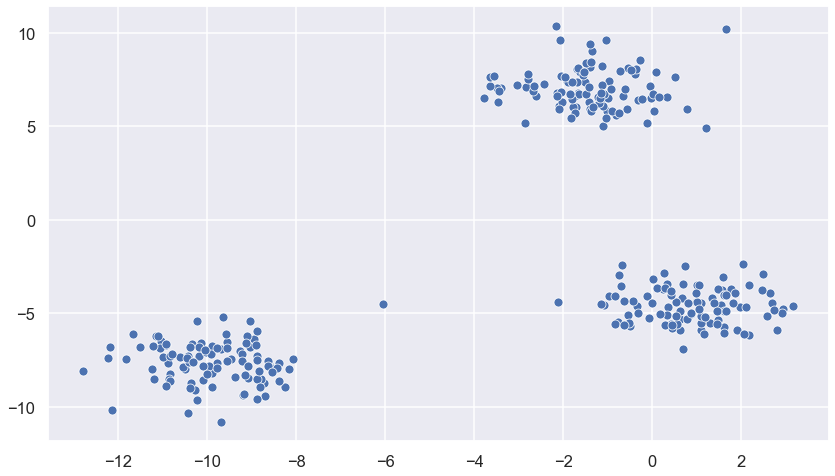

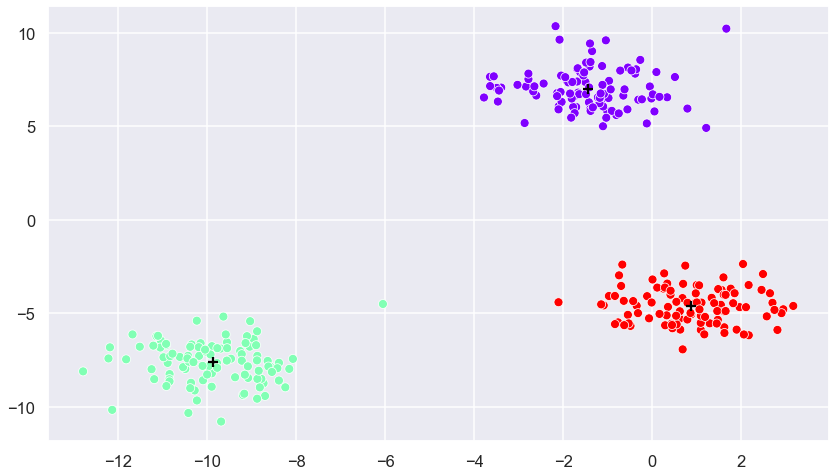

(array([[-1.44984633,  7.01887513],
        [-9.86760177, -7.61037522],
        [ 0.86630547, -4.60164258]]),
 array([1., 0., 1., 1., 1., 0., 2., 1., 0., 2., 0., 2., 0., 2., 2., 0., 2.,
        0., 2., 1., 1., 2., 2., 2., 1., 0., 0., 1., 0., 0., 0., 2., 2., 2.,
        0., 2., 2., 0., 0., 1., 0., 0., 2., 2., 2., 2., 2., 1., 0., 2., 2.,
        0., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 0., 2., 2., 0., 1.,
        0., 1., 0., 1., 2., 1., 0., 0., 0., 0., 2., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 0., 0., 2., 2., 1., 1., 1., 2., 0., 1., 2., 0., 1., 0.,
        2., 0., 2., 0., 1., 0., 1., 1., 0., 1., 0., 2., 1., 1., 2., 1., 2.,
        2., 2., 2., 0., 2., 1., 2., 0., 1., 0., 0., 1., 0., 2., 1., 2., 1.,
        2., 1., 2., 0., 0., 0., 0., 1., 0., 1., 1., 1., 2., 1., 0., 2., 2.,
        2., 1., 2., 0., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 0., 1., 1.,
        2., 1., 1., 2., 0., 2., 2., 1., 0., 2., 2., 0., 2., 1., 1., 1., 0.,
        1., 1., 1., 0., 2., 0., 0., 2., 0., 1., 2., 2.

In [4]:
do_kmeans_clustering(3, df, 30)

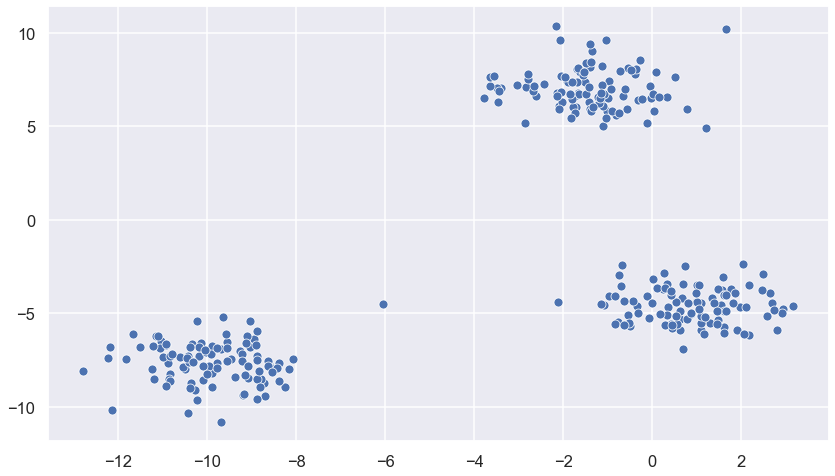

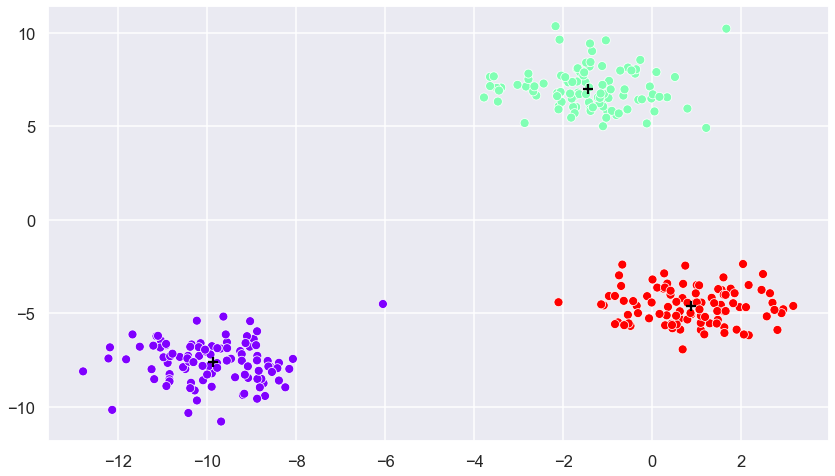

(array([[-9.86760177, -7.61037522],
        [-1.44984633,  7.01887513],
        [ 0.86630547, -4.60164258]]),
 array([0., 1., 0., 0., 0., 1., 2., 0., 1., 2., 1., 2., 1., 2., 2., 1., 2.,
        1., 2., 0., 0., 2., 2., 2., 0., 1., 1., 0., 1., 1., 1., 2., 2., 2.,
        1., 2., 2., 1., 1., 0., 1., 1., 2., 2., 2., 2., 2., 0., 1., 2., 2.,
        1., 0., 0., 0., 0., 2., 0., 0., 2., 0., 0., 2., 1., 2., 2., 1., 0.,
        1., 0., 1., 0., 2., 0., 1., 1., 1., 1., 2., 1., 0., 1., 1., 1., 0.,
        1., 1., 0., 1., 1., 2., 2., 0., 0., 0., 2., 1., 0., 2., 1., 0., 1.,
        2., 1., 2., 1., 0., 1., 0., 0., 1., 0., 1., 2., 0., 0., 2., 0., 2.,
        2., 2., 2., 1., 2., 0., 2., 1., 0., 1., 1., 0., 1., 2., 0., 2., 0.,
        2., 0., 2., 1., 1., 1., 1., 0., 1., 0., 0., 0., 2., 0., 1., 2., 2.,
        2., 0., 2., 1., 0., 0., 0., 2., 2., 2., 2., 2., 2., 0., 1., 0., 0.,
        2., 0., 0., 2., 1., 2., 2., 0., 1., 2., 2., 1., 2., 0., 0., 0., 1.,
        0., 0., 0., 1., 2., 1., 1., 2., 1., 0., 2., 2.

In [5]:
do_kmeans_clustering(3, df, 60)

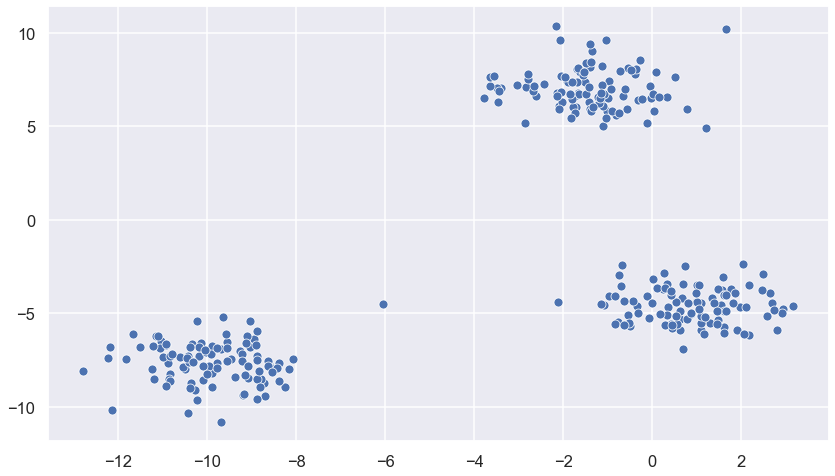

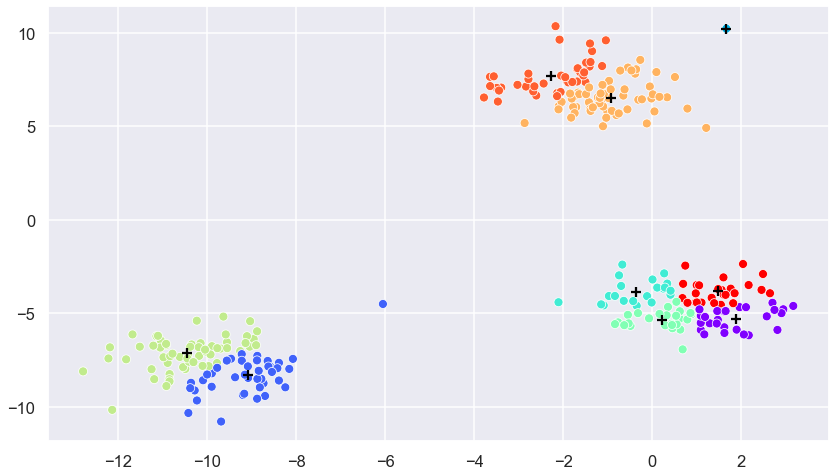

(array([[  1.8804307 ,  -5.28859364],
        [ -9.08201629,  -8.31434136],
        [  1.66374234,  10.22972616],
        [ -0.36832802,  -3.82619659],
        [  0.21028404,  -5.369815  ],
        [-10.43647401,  -7.10060663],
        [ -0.91577989,   6.49755362],
        [ -2.28129613,   7.67804088],
        [  1.48173528,  -3.80353723]]),
 array([5., 7., 1., 1., 5., 7., 8., 1., 6., 3., 6., 3., 7., 0., 8., 6., 8.,
        6., 8., 1., 1., 4., 8., 8., 5., 6., 6., 1., 7., 6., 6., 4., 8., 4.,
        6., 8., 8., 7., 6., 5., 6., 6., 8., 4., 0., 3., 0., 5., 6., 0., 3.,
        7., 5., 5., 5., 5., 8., 5., 1., 3., 5., 1., 3., 7., 8., 0., 7., 1.,
        7., 5., 6., 1., 0., 5., 7., 6., 7., 6., 3., 6., 5., 6., 7., 6., 1.,
        6., 6., 5., 6., 2., 0., 4., 5., 1., 5., 0., 7., 5., 0., 7., 1., 6.,
        4., 7., 4., 6., 5., 7., 1., 1., 7., 5., 6., 0., 5., 5., 8., 5., 8.,
        3., 4., 0., 6., 4., 5., 0., 6., 5., 6., 7., 1., 6., 0., 5., 0., 1.,
        8., 5., 4., 6., 6., 7., 7., 5., 7., 5., 

In [6]:
do_kmeans_clustering(9, df, 30)

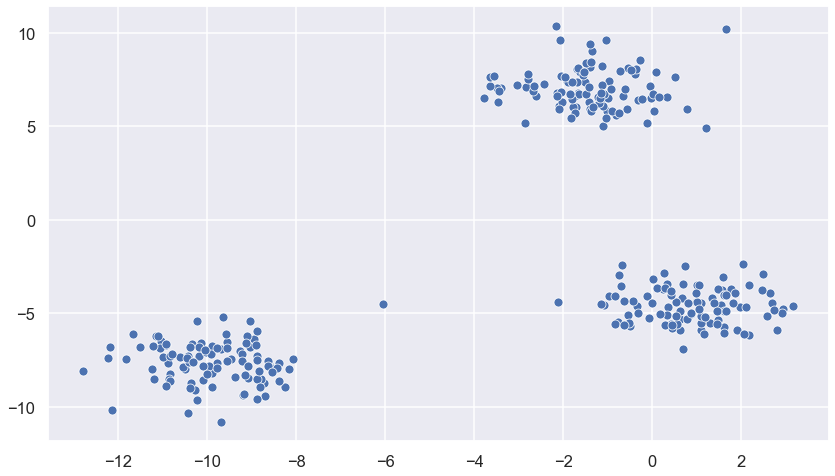

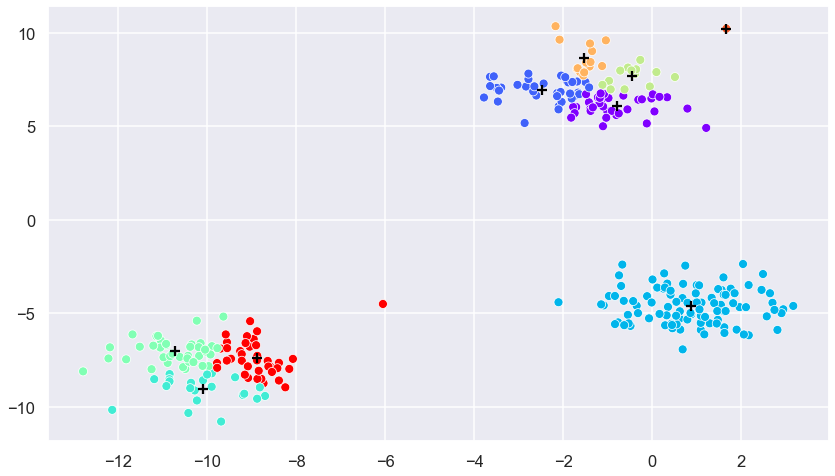

(array([[ -0.80186559,   6.08485082],
        [ -2.46588776,   6.96605998],
        [  0.86630547,  -4.60164258],
        [-10.09234995,  -9.06543704],
        [-10.7222197 ,  -7.02186104],
        [ -0.44931455,   7.68339775],
        [ -1.53601023,   8.64711555],
        [  1.66374234,  10.22972616],
        [ -8.88620281,  -7.37808529]]),
 array([4., 1., 3., 8., 8., 1., 2., 3., 0., 2., 0., 2., 1., 2., 2., 0., 2.,
        5., 2., 3., 3., 2., 2., 2., 4., 0., 0., 8., 6., 0., 5., 2., 2., 2.,
        1., 2., 2., 1., 1., 4., 5., 1., 2., 2., 2., 2., 2., 4., 0., 2., 2.,
        6., 4., 4., 4., 4., 2., 4., 3., 2., 4., 3., 2., 1., 2., 2., 1., 8.,
        1., 3., 0., 8., 2., 4., 1., 0., 1., 5., 2., 0., 4., 0., 6., 0., 8.,
        0., 0., 8., 0., 7., 2., 2., 8., 8., 4., 2., 1., 4., 2., 1., 3., 5.,
        2., 1., 2., 5., 8., 1., 8., 8., 6., 4., 0., 2., 8., 4., 2., 4., 2.,
        2., 2., 2., 0., 2., 4., 2., 0., 4., 0., 6., 8., 0., 2., 4., 2., 3.,
        2., 4., 2., 0., 0., 1., 6., 4., 6., 4., 

In [7]:
do_kmeans_clustering(9, df, 60)

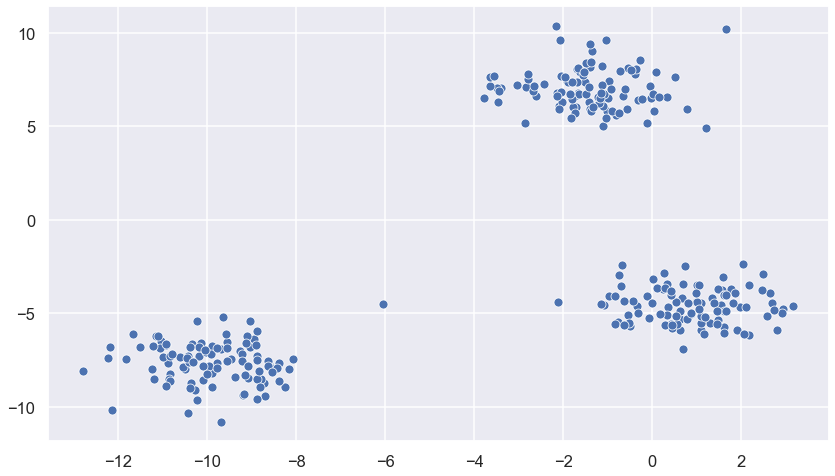

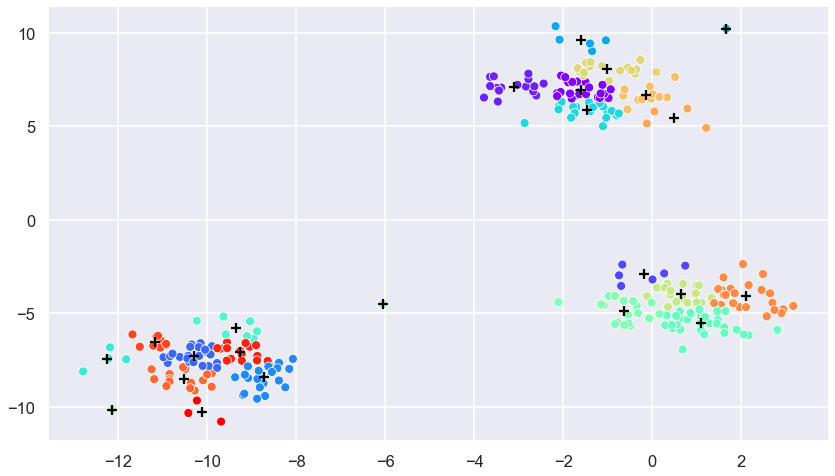

(array([[ -1.59908948,   6.96229461],
        [ -3.11288107,   7.12916374],
        [ -0.1834501 ,  -2.89289362],
        [-10.28690176,  -7.26310295],
        [ -8.72220808,  -8.40548487],
        [ -1.60880414,   9.61377581],
        [  1.66374234,  10.22972616],
        [ -1.46311837,   5.85672052],
        [-12.2457022 ,  -7.44167052],
        [ -9.340902  ,  -5.80255397],
        [  1.10283076,  -5.50938695],
        [ -0.64498891,  -4.86012047],
        [-12.1271337 , -10.15438517],
        [ -6.0476832 ,  -4.49304369],
        [  0.64194038,  -3.97407615],
        [ -1.0049131 ,   8.05329211],
        [ -0.12974974,   6.68721931],
        [  0.48225675,   5.46038602],
        [  2.11461526,  -4.08364634],
        [-10.51638832,  -8.49123892],
        [-11.1698649 ,  -6.51400816],
        [ -9.24645114,  -7.07628948],
        [-10.10741213, -10.25070556]]),
 array([19.,  1., 19.,  4., 21.,  0., 14., 19., 17., 11., 17., 14.,  0.,
        10., 14.,  7., 14., 15., 14., 22., 19., 14.

In [8]:
do_kmeans_clustering(23, df, 80)

## Perguntas

Após realizar sua implementação base, faça testes de acordo com  as perguntas abaixo e escreva suas percepções.

1.	Realize experimentos com diferentes valores para o random state na inicialização de centróides. O que você pode observar?

Para a base sintética criada e com k=3, a variação do random state não produz variações na composição dos clusters encontrados. Deve ser considerado que esta implementação do algoritmo inicialmente não estava encontrando em todas as execuções o número de clusters solicitados, ou seja, alguns centroides estavam ficando sozinhos no espaço sem formar clusters, especialmente com números maiores de k. As soluções encontradas foram reiniciar aleatóriamente os centroides que não conseguiram formar clusters e inserir um laço mais externo certificando que o algoritmo encontrou o número de clusters conforme o k solicitado.

2.	Realize experimentos com diferentes valores de k (número de clusters). O que você pode observar? O que acontece se  você variar o valor de k e o random state na inicialização de centróides, ao mesmo tempo?

Alterando apenas o valor de k sem mudar o random state, o algoritmo encontra clusters conforme o k solicitado. Já ao alterar o valor de k para um número maior, como 9 por exemplo, e testando valores diferentes de random state, é possível perceber que os clusters formados acabam sendo diferentes, mesmo com um valor de k igual. 

3.	O que você aprendeu ao realizar essa implementação?

Percebo que foi uma implementação um pouco mais complicada de realizar do que o pensado inicialmente. Entende-se que as soluções aplicadas para contornar os problemas encontrados, como no caso dos centróides que não conseguem formar clusters, possivelmente não são as mais eficientes. Percebe-se isto principalmente quando comparado com o desempenho da função disponível no scikit-learn, uma vez que essa encontra em geral clusters de tamanhos mais coesos e semelhantes, provalvelmente pois procura minimizar o valor de inércia entre todos os clusters, e assim não cria clusters de tamanhos muito distintos como os verificados em alguns casos da solução implementada neste trabalho com valores maiores de k, por exemplo quando k=9.
